In [875]:
import numpy as np
import matplotlib.pyplot as plt 
import statistics

In [876]:
# to set 
k0 = 50 * np.pi 
epsilon = 1E-3
J = 1000

lambdaa = 1



In [877]:
# Domain parameters 
delta = 2 * epsilon**2 / lambdaa 
L = J * epsilon  # length of the domain
T = L / k0 # total time, ~ L / k0
nx = 200  # number of spatial points
nt = 200  # number of time steps

dx = L / nx
dt = T / nt

x = np.linspace(0, L, nx)
print(delta)
print(delta*nx)
print(T)

2e-06
0.00039999999999999996
0.006366197723675813


In [878]:
# Gaussian wave packet
x0 = L / 4  # center of the wave packet
v0 = L / (2 * T) # 2*np.sqrt(V0) #(L / 2*T) / 2 #np.pi * 50 # 
# k0 = 50 * np.pi #v0 / 2 # wave number of the wave packet (p = hbar*k)
sigma = L / 20  # width of the wave packet
# epsilon = np.pi / (20 * k0)
N = (np.pi * sigma ** 2)**(-1/4) # Normalization 
delta = T / N
gaussian = np.exp(-0.5 * ((x - x0) / sigma) ** 2)
phase = np.exp(1j * k0 * x)
psi0 = (gaussian * phase) * N
norm = np.sum(psi0 * np.conj(psi0)) * dx
print(norm)



(0.9949999999995622+0j)


In [879]:
# Potential initial conditions 
V0 = (0.5* k0**2)  # potential strength
a = 0.032 #0.032  # width
V = np.zeros(nx)
V[int((nx - a * nx) / 2):int((nx + a * nx) / 2)] = V0 # indices for start and end of the well 
print(epsilon)

0.001


In [880]:
# Build coefficient matrix, a+
aplus = np.zeros((nx, nx),complex)
nu = 1j * dt / (4 * dx**2) # kinetic energy operator

for i in range(len(aplus) - 1): # off diagonal 
    aplus[i,i+1] = aplus[i+1,i] = -nu 

for i in range(len(aplus)): # diagonal
    aplus[i,i] = 1 + 2 * nu 

aplus_inv = np.linalg.inv(aplus)


In [881]:
# Build coefficient matrix, a-
aminus = np.zeros((nx, nx),complex)

for i in range(len(aminus)-1): # off diagonal 
    aminus[i,i+1] = aminus[i+1,i] = nu  

for i in range(len(aminus)): # diagonal
    aminus[i,i] = 1 - 2 * nu 

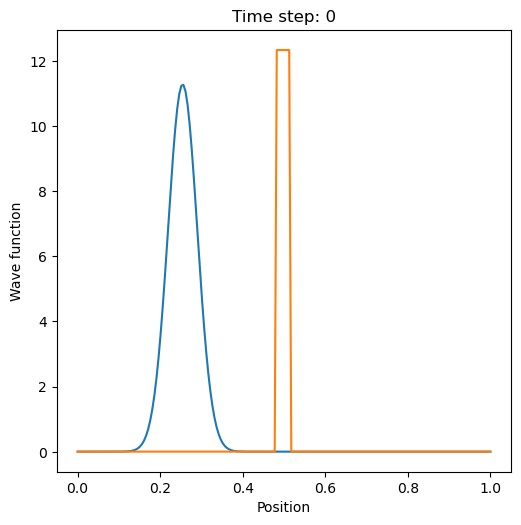

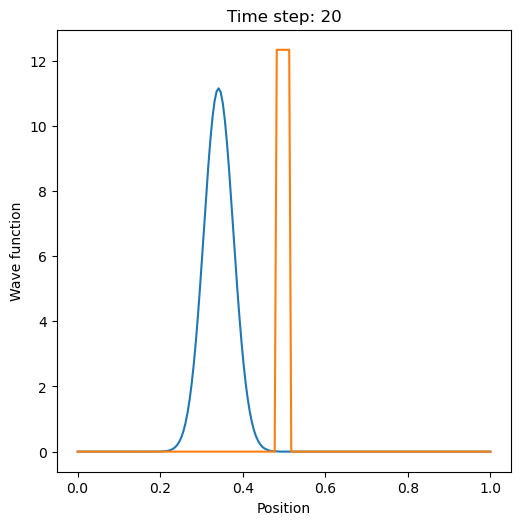

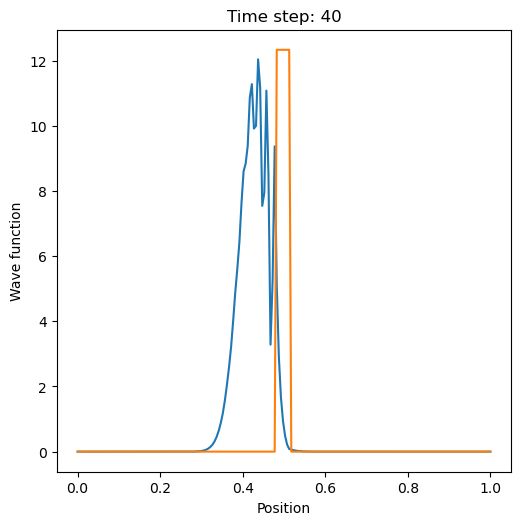

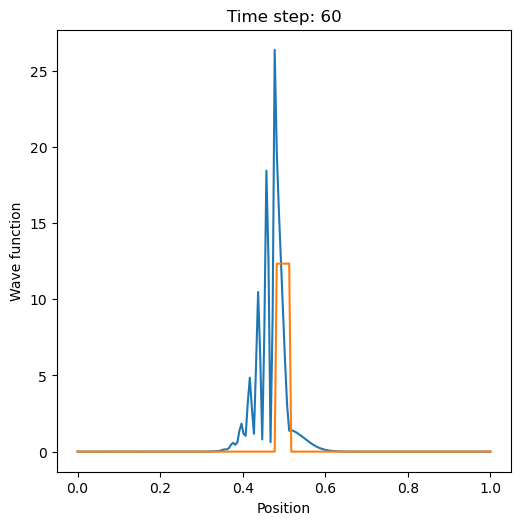

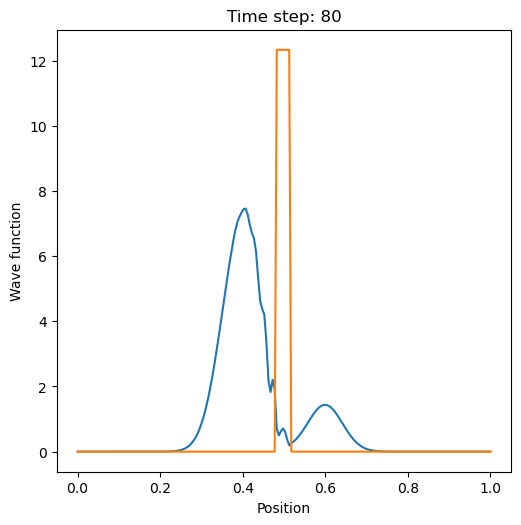

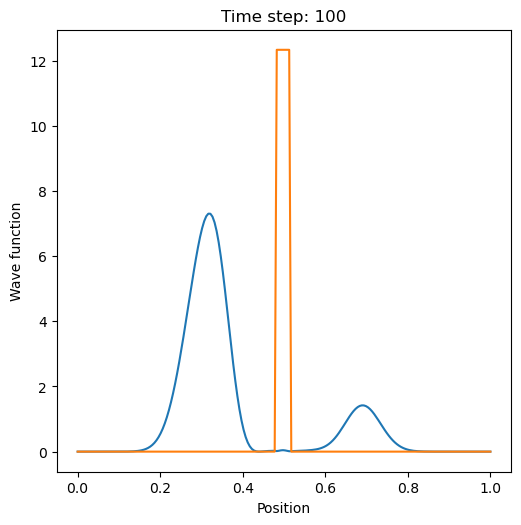

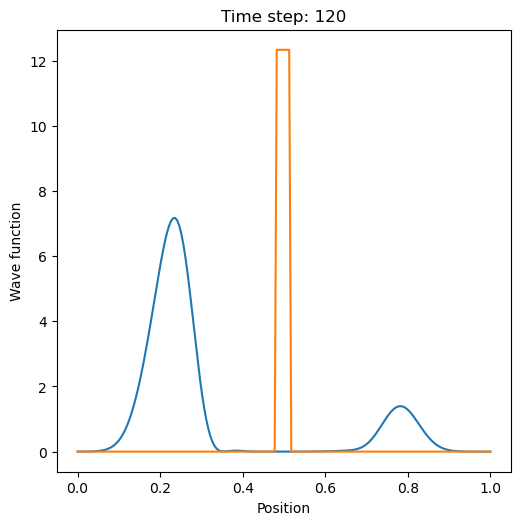

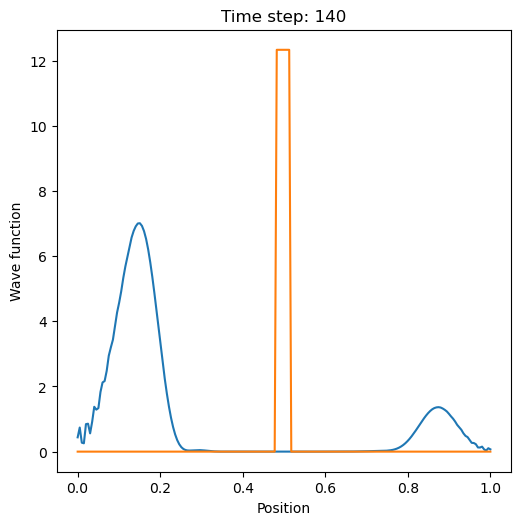

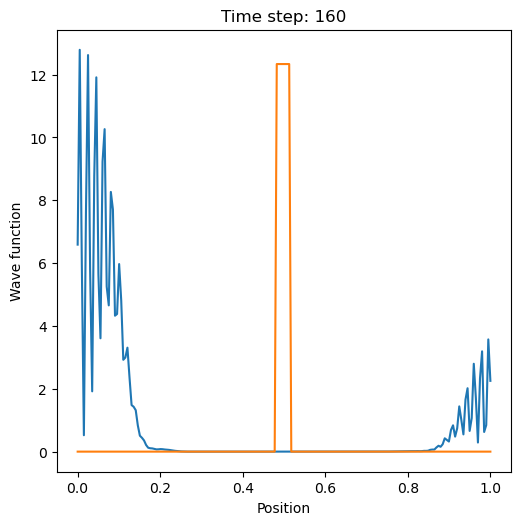

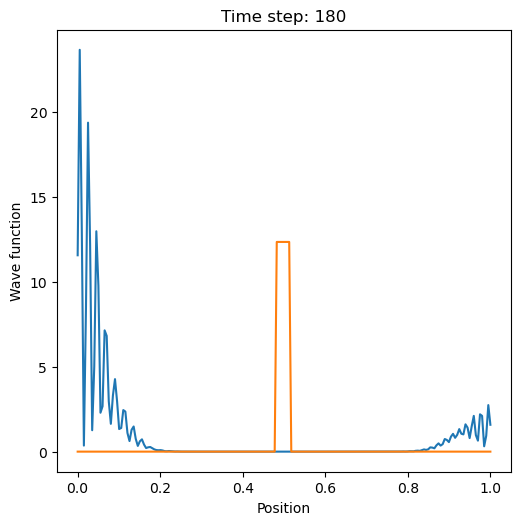

In [882]:
# Crank-Nicholson
for t in range(nt):
    f = np.exp(-1j * dt * V) * psi0
    psi = np.dot(aplus_inv, np.dot(aminus, f))
    psi0 = psi
    
    # plotting 
    if t % 20 == 0:
        # plt.plot(x, np.abs(psi))#, label=f'Time step: {t}')
        plt.figure(figsize=(10, 500))
        num_cols = 2  # Number of columns for subplots
        num_rows = (nt + num_cols - 1) // num_cols

        plt.subplot(num_rows, num_cols, t + 1)
        plt.plot(x, np.abs(psi)**2)
        plt.plot(x, V * epsilon)
        plt.title(f'Time step: {t}')
        plt.xlabel('Position')
        plt.ylabel('Wave function')
        plt.tight_layout()
    
plt.show()

# plt.plot(x, V, label='Potential (V)')
# plt.xlabel('Position')
# plt.ylabel('Wave function')
# plt.title('Gaussian wave packet scattering (TDSE w/ CN)')
# plt.legend()
# plt.show()


In [883]:
# Reflection and transmisison coefficients 
center = int(nx/2) # center of well
width = end - start # width of the well in spacial domain 

# Extract wavefunction segments for each region
reflected_wavefunction = psi[0: center] 
transmitted_wavefunction = psi[center: nx] 

# Calculate
norm = np.sum(psi * np.conj(psi)) * dx
R = np.sum(reflected_wavefunction * np.conj(reflected_wavefunction)) * dx / norm 
T = np.sum(transmitted_wavefunction * np.conj(transmitted_wavefunction)) * dx / norm

print(f"Reflection coefficient (R): {R}")
print(f"Transmission coefficient (T): {T}")
print(R + T)
print(norm)



Reflection coefficient (R): (0.8439136997078758+0j)
Transmission coefficient (T): (0.15608630029212425+0j)
(1+0j)
(0.9949999999996574+0j)


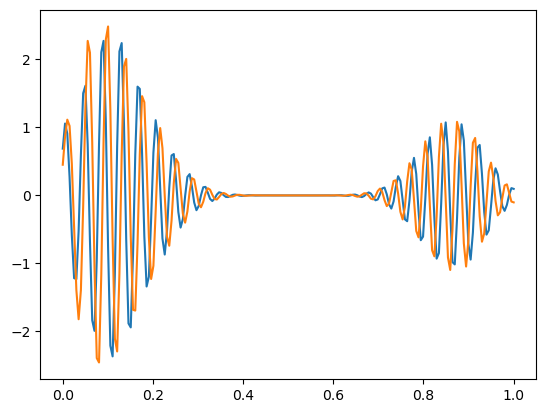

In [884]:
f = np.exp(-1j * dt * V) * psi0
# plt.plot(x, V)
plt.plot(x, f.real)
plt.plot(x, f.imag)
plt.show()